In [1]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

model = models.vgg16(pretrained=True).features
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_embedding(image_path):
    img = Image.open(image_path).convert('RGB')
    img_t = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        features = model(img_t)
    embedding = torch.nn.functional.adaptive_avg_pool2d(features, (1, 1))
    embedding = embedding.view(embedding.size(0), -1)
    embedding = torch.nn.functional.normalize(embedding, p=2, dim=1)
    return embedding

def compare_logos(query_embedding, template_embeddings, threshold=0.65):
    templates_tensor = torch.cat(template_embeddings, dim=0)
    similarities = torch.nn.functional.cosine_similarity(
        query_embedding, 
        templates_tensor, 
        dim=1 
    )
    max_similarity = torch.max(similarities).item()
    print(f"Максимальное сходство: {max_similarity:.4f}")
    return max_similarity > threshold

/Users/kseniashk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kseniashk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
valid_extensions = {'.jpg', '.jpeg', '.png', '.webp'}

НАХОДИМ Вкусно и точка :
Максимальное сходство: 0.8230


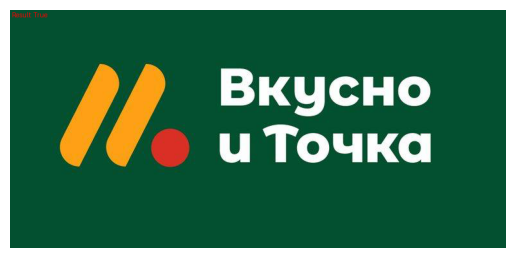

Логотип принадлежит организации: True
Максимальное сходство: 0.5044


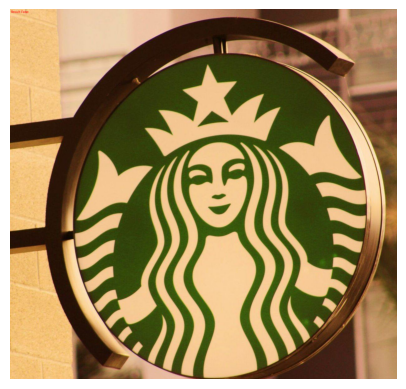

Логотип принадлежит организации: False
Максимальное сходство: 0.7478


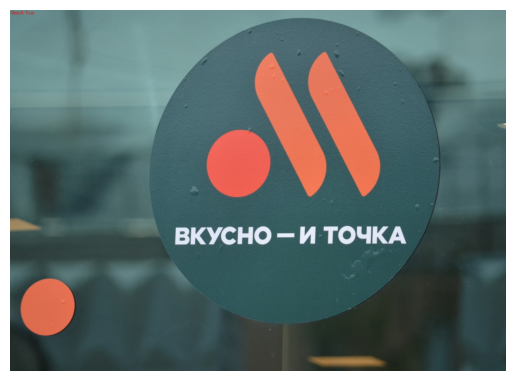

Логотип принадлежит организации: True
Максимальное сходство: 0.4291


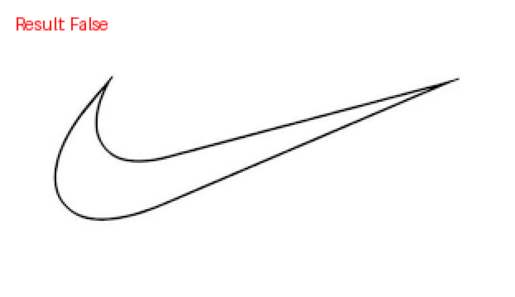

Логотип принадлежит организации: False
Максимальное сходство: 0.9146


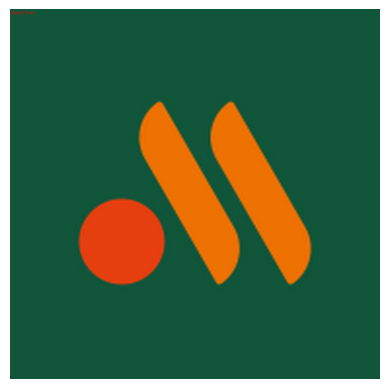

Логотип принадлежит организации: True
Максимальное сходство: 0.5427


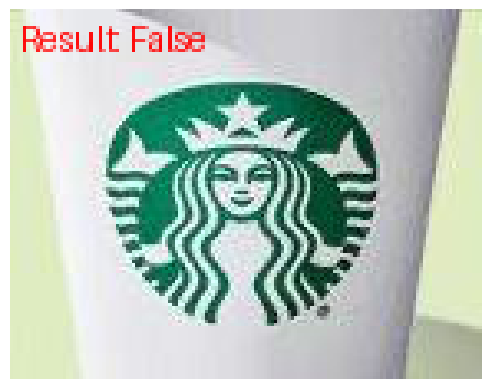

Логотип принадлежит организации: False
Максимальное сходство: 0.7663


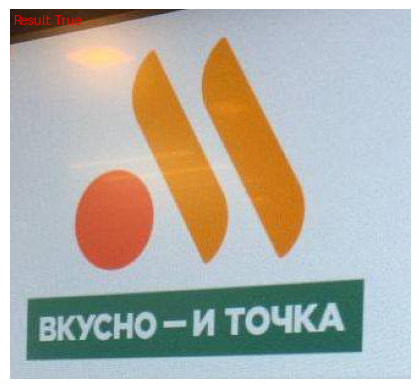

Логотип принадлежит организации: True
Максимальное сходство: 0.2726


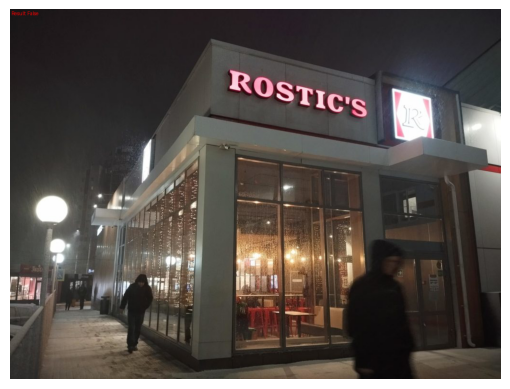

Логотип принадлежит организации: False
Максимальное сходство: 0.4620


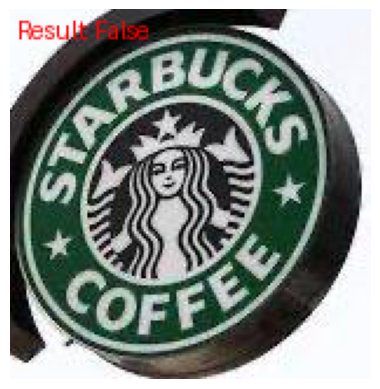

Логотип принадлежит организации: False
Максимальное сходство: 0.2851


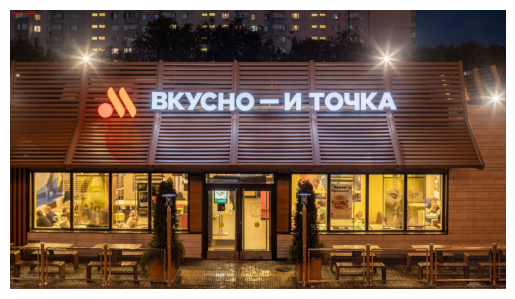

Логотип принадлежит организации: False
Максимальное сходство: 0.2718


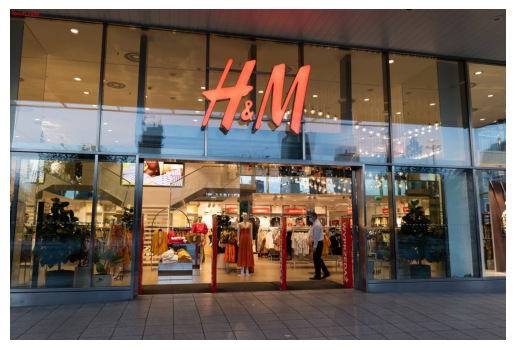

Логотип принадлежит организации: False
Максимальное сходство: 0.6482


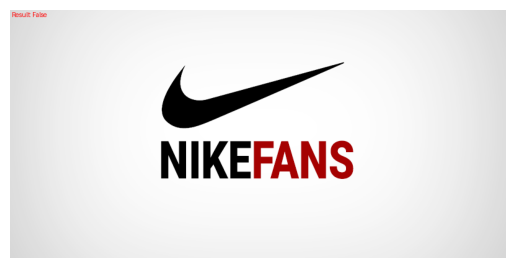

Логотип принадлежит организации: False
Максимальное сходство: 0.6531


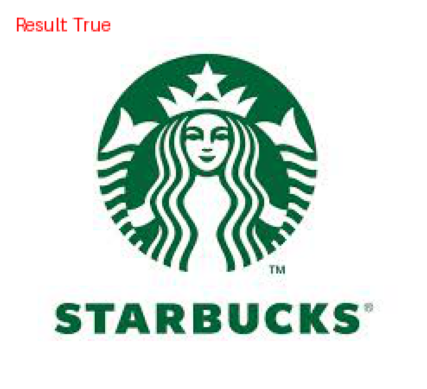

Логотип принадлежит организации: True
Максимальное сходство: 0.3908


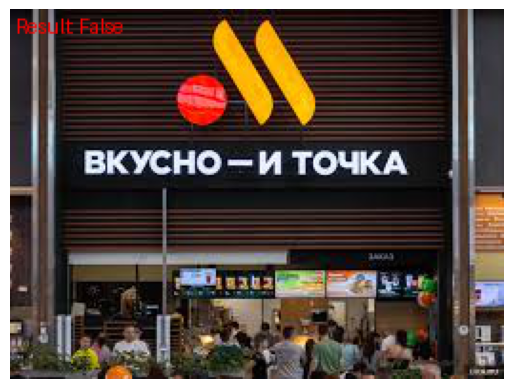

Логотип принадлежит организации: False


In [3]:
folder_logo = "Вкусно и точка"
template_embeddings = []
for logo_path in os.listdir(folder_logo):
    full_path = os.path.join(folder_logo, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    template_embeddings.append(get_embedding(full_path))
valid_extensions = {'.jpg', '.jpeg', '.png', '.webp'}
print("НАХОДИМ", folder_logo, ':')
folder = "examples"
for logo_path in os.listdir(folder):
    full_path = os.path.join(folder, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    query_embedding = get_embedding(full_path)
    result = compare_logos(query_embedding, template_embeddings)
    image = Image.open(full_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    draw.text((3, 3), f"Result: {result}", fill="red")
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f"Логотип принадлежит организации: {result}")

НАХОДИМ Starbucks :
Максимальное сходство: 0.5297


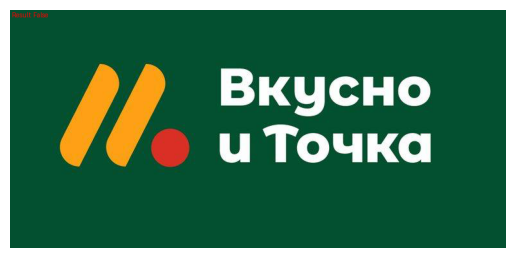

Логотип принадлежит организации: False
Максимальное сходство: 0.8894


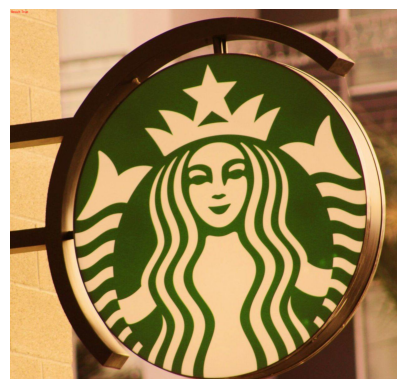

Логотип принадлежит организации: True
Максимальное сходство: 0.6205


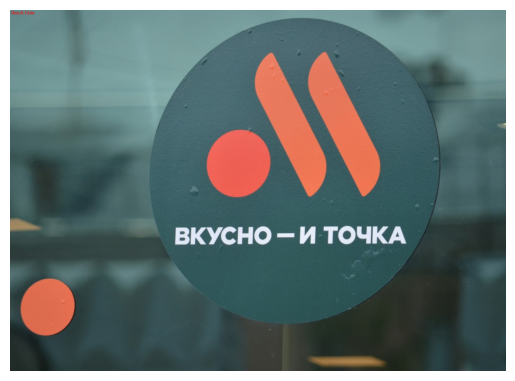

Логотип принадлежит организации: False
Максимальное сходство: 0.4566


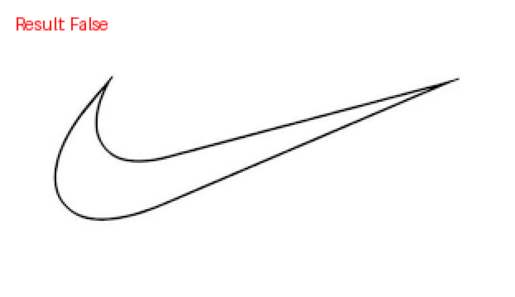

Логотип принадлежит организации: False
Максимальное сходство: 0.4320


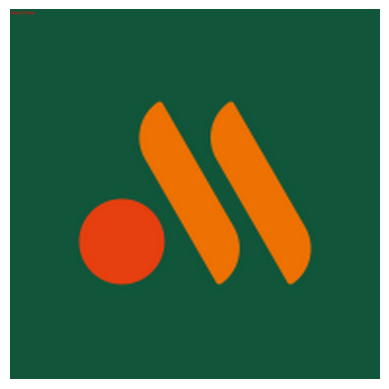

Логотип принадлежит организации: False
Максимальное сходство: 0.6845


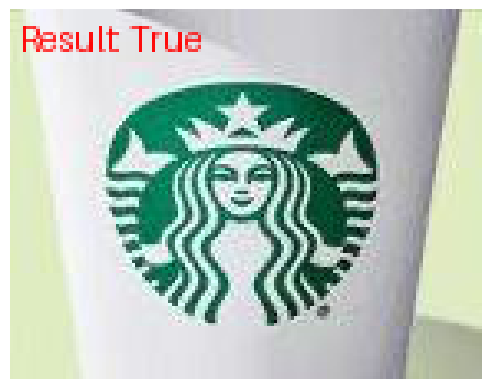

Логотип принадлежит организации: True
Максимальное сходство: 0.5070


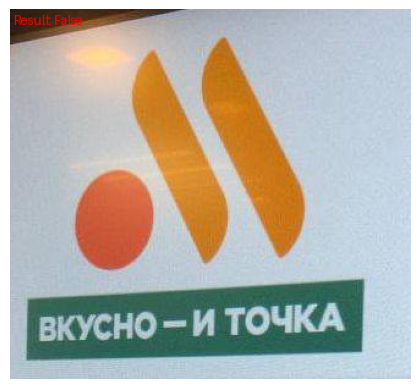

Логотип принадлежит организации: False
Максимальное сходство: 0.2760


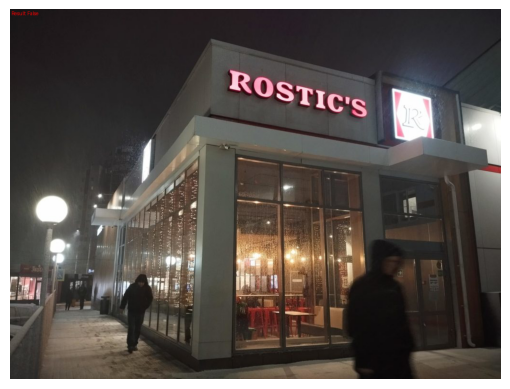

Логотип принадлежит организации: False
Максимальное сходство: 0.7018


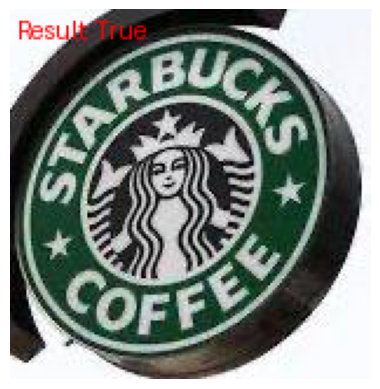

Логотип принадлежит организации: True
Максимальное сходство: 0.2950


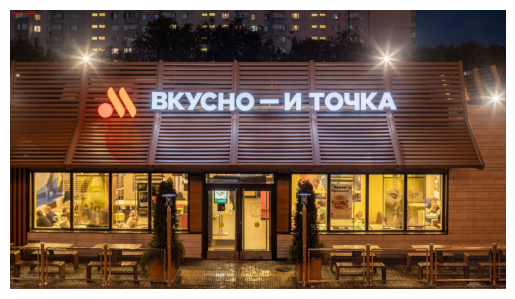

Логотип принадлежит организации: False
Максимальное сходство: 0.3027


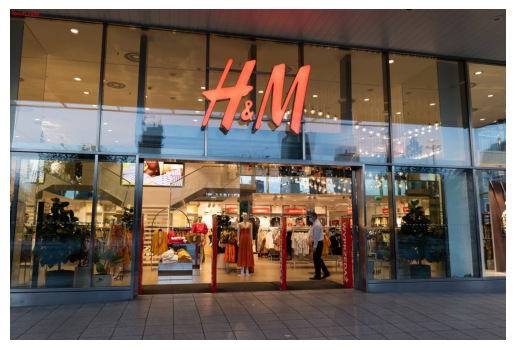

Логотип принадлежит организации: False
Максимальное сходство: 0.5564


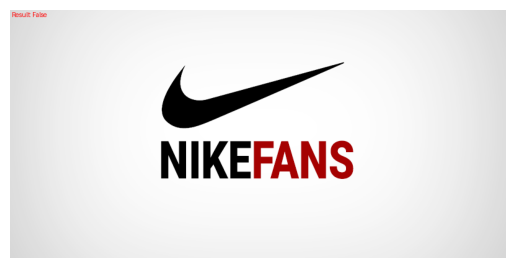

Логотип принадлежит организации: False
Максимальное сходство: 0.9637


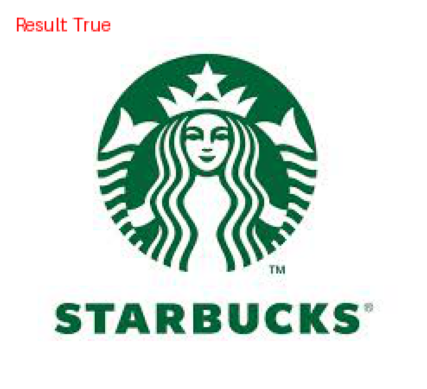

Логотип принадлежит организации: True
Максимальное сходство: 0.3348


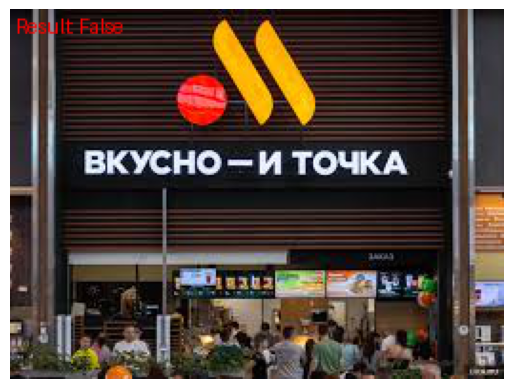

Логотип принадлежит организации: False


In [4]:
folder_logo = "Starbucks"
template_embeddings = []
for logo_path in os.listdir(folder_logo):
    full_path = os.path.join(folder_logo, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    template_embeddings.append(get_embedding(full_path))
valid_extensions = {'.jpg', '.jpeg', '.png', '.webp'}
print("НАХОДИМ", folder_logo, ':')
folder = "examples"
for logo_path in os.listdir(folder):
    full_path = os.path.join(folder, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    query_embedding = get_embedding(full_path)
    result = compare_logos(query_embedding, template_embeddings)
    image = Image.open(full_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    draw.text((3, 3), f"Result: {result}", fill="red")
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f"Логотип принадлежит организации: {result}")

НАХОДИМ Nike :
Максимальное сходство: 0.5974


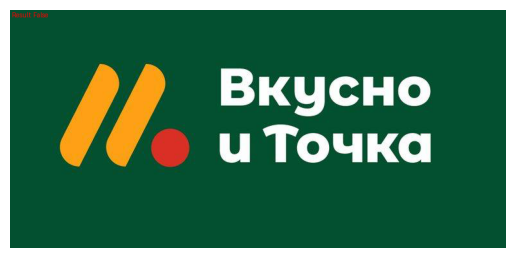

Логотип принадлежит организации: False
Максимальное сходство: 0.4043


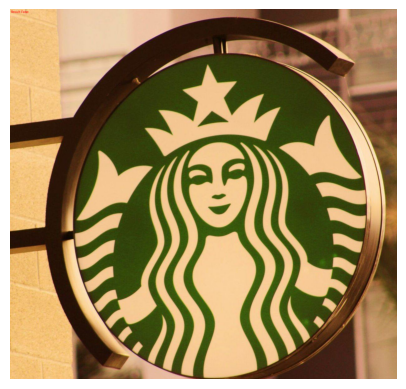

Логотип принадлежит организации: False
Максимальное сходство: 0.6014


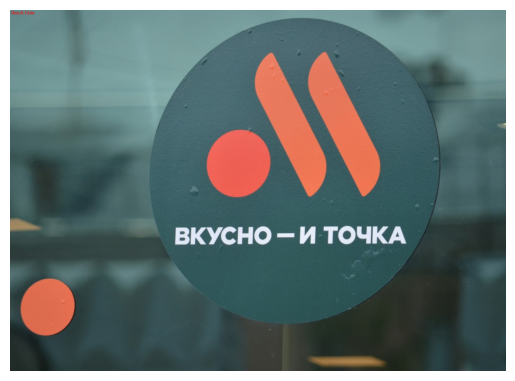

Логотип принадлежит организации: False
Максимальное сходство: 0.6585


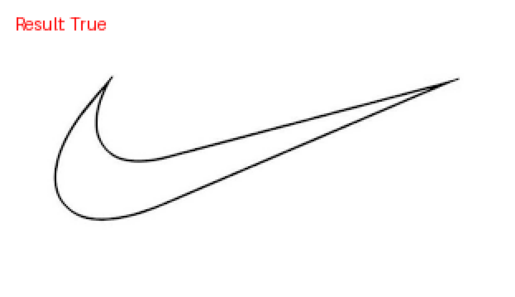

Логотип принадлежит организации: True
Максимальное сходство: 0.6023


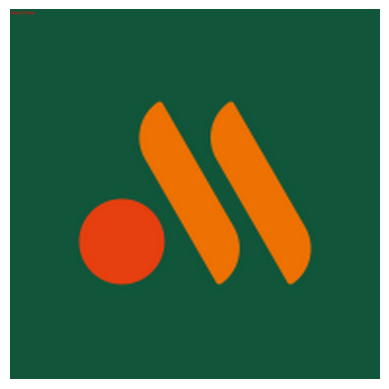

Логотип принадлежит организации: False
Максимальное сходство: 0.4750


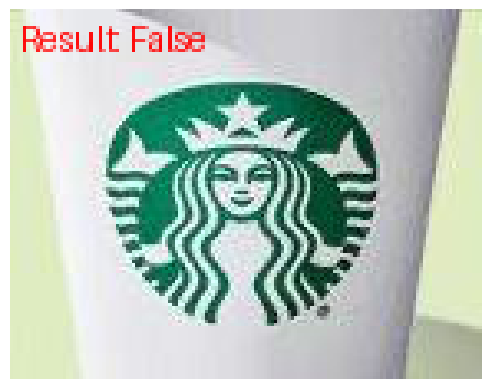

Логотип принадлежит организации: False
Максимальное сходство: 0.5679


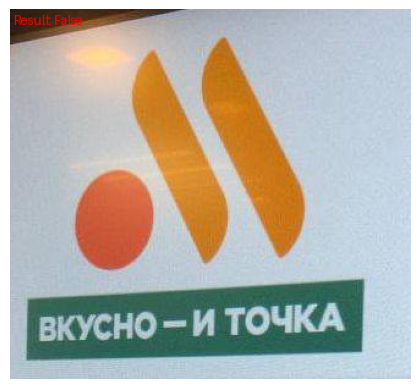

Логотип принадлежит организации: False
Максимальное сходство: 0.4247


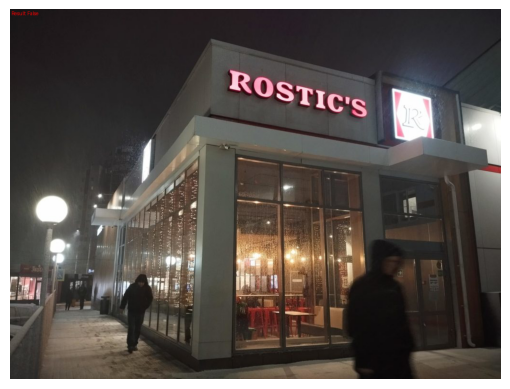

Логотип принадлежит организации: False
Максимальное сходство: 0.3549


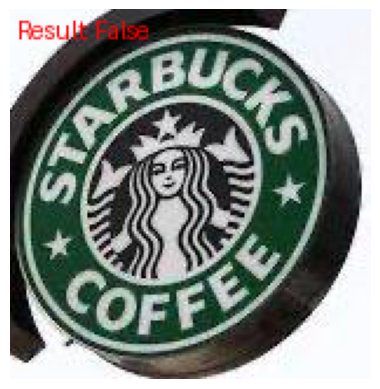

Логотип принадлежит организации: False
Максимальное сходство: 0.4095


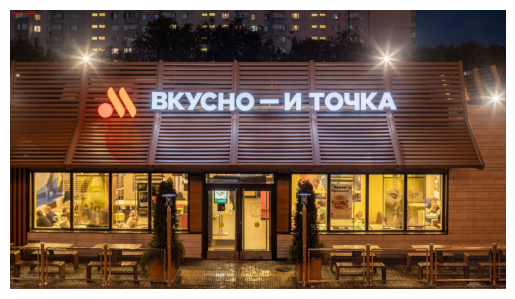

Логотип принадлежит организации: False
Максимальное сходство: 0.3882


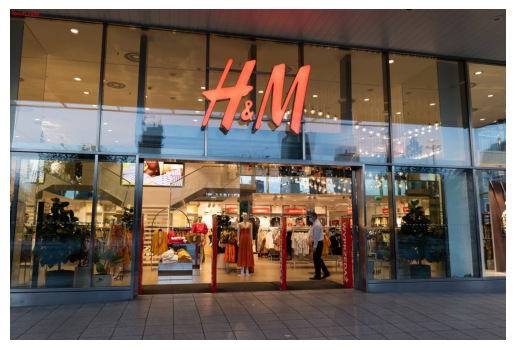

Логотип принадлежит организации: False
Максимальное сходство: 0.8124


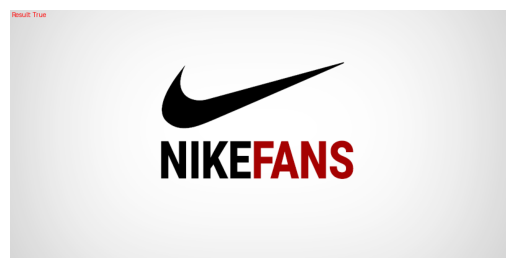

Логотип принадлежит организации: True
Максимальное сходство: 0.5833


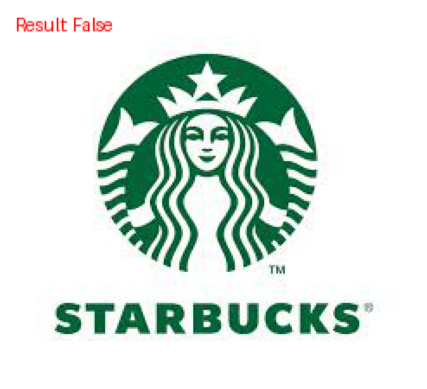

Логотип принадлежит организации: False
Максимальное сходство: 0.4222


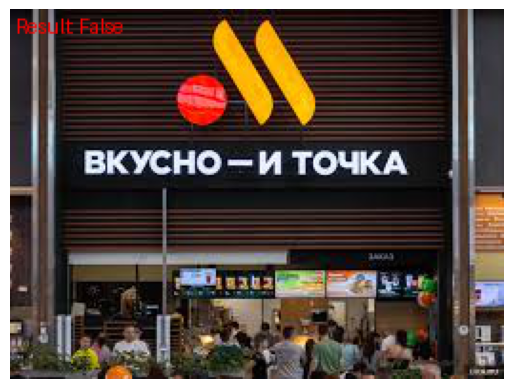

Логотип принадлежит организации: False


In [5]:
folder_logo = "Nike"
template_embeddings = []
for logo_path in os.listdir(folder_logo):
    full_path = os.path.join(folder_logo, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    template_embeddings.append(get_embedding(full_path))
valid_extensions = {'.jpg', '.jpeg', '.png', '.webp'}
print("НАХОДИМ", folder_logo, ':')
folder = "examples"
for logo_path in os.listdir(folder):
    full_path = os.path.join(folder, logo_path)
    if logo_path.startswith('.') or not os.path.isfile(full_path):
        continue
    if os.path.splitext(logo_path)[1].lower() not in valid_extensions:
        continue
    query_embedding = get_embedding(full_path)
    result = compare_logos(query_embedding, template_embeddings)
    image = Image.open(full_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    draw.text((3, 3), f"Result: {result}", fill="red")
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f"Логотип принадлежит организации: {result}")

Всё верно работает